# <center>Proyecto</center>
# <center>Análisis de desempeño y preferencias de videojuegos<center>
**<center>Juan Manuel Ramirez</center>**
[Carga y procesamiento inicial](#carga-procesamiento)
<br>
[Modelo NN](#ModeloNN)
<br>
[Clustering](#Clustering)
<br>
[Conclusiones](#Conclusiones)


## Modulos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

## Carga y procesamiento inicial <a class="anchor" id="carga-procesamiento"></a>

In [2]:
data1 = pd.read_csv('video_game.csv')
data2 = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
print('Cantidad inicial de datos', data1.shape[0])


data1 = data1.dropna()
data2 = data2.dropna()

print(data1.describe().T)

print('Las bases coinciden en nombres:', all(data1["Name"] == data2["Name"]))
print('Cantidad de datos a usar', data1.shape[0])

copiar = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
data1[copiar] = data2[copiar]
data1 = data1.drop(columns = ['Unnamed: 0', 'Global_players', 'Rating'])

valores = ['NA_players', 'EU_players', 'JP_players', 'Other_players', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'User_Score']

X = data1[valores]
variables = X.T.index 

y = data1['Genre'].values
y = y.reshape(-1, 1)
etiquetas = data1['Genre'].values.reshape(-1, 1)


data2.describe().T

Cantidad inicial de datos 16719
                  count         mean          std      min      25%      50%  \
Unnamed: 0       6825.0  6627.323663  4516.872772     1.00  2717.00  5980.00   
Year_of_Release  6825.0  2007.436777     4.211248  1985.00  2004.00  2007.00   
NA_players       6825.0     0.394484     0.967385     0.00     0.06     0.15   
EU_players       6825.0     0.236089     0.687330     0.00     0.02     0.06   
JP_players       6825.0     0.064158     0.287570     0.00     0.00     0.00   
Other_players    6825.0     0.082677     0.269871     0.00     0.01     0.02   
Global_players   6825.0     0.777590     1.963443     0.01     0.11     0.29   
Critic_Score     6825.0    70.272088    13.868572    13.00    62.00    72.00   
Critic_Count     6825.0    28.931136    19.224165     3.00    14.00    25.00   
User_Count       6825.0   174.722344   587.428538     4.00    11.00    27.00   

                      75%       max  
Unnamed: 0       10102.00  16707.00  
Year_of_Rel

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,6825.0,2007.436777,4.211248,1985.00,2004.00,2007.00,2011.00,2016.00
NA_Sales,6825.0,0.394484,0.967385,0.00,0.06,0.15,0.39,41.36
EU_Sales,6825.0,0.236089,0.687330,0.00,0.02,0.06,0.21,28.96
JP_Sales,6825.0,0.064158,0.287570,0.00,0.00,0.00,0.01,6.50
Other_Sales,6825.0,0.082677,0.269871,0.00,0.01,0.02,0.07,10.57
Global_Sales,6825.0,0.777590,1.963443,0.01,0.11,0.29,0.75,82.53
Critic_Score,6825.0,70.272088,13.868572,13.00,62.00,72.00,80.00,98.00
Critic_Count,6825.0,28.931136,19.224165,3.00,14.00,25.00,39.00,113.00
User_Count,6825.0,174.722344,587.428538,4.00,11.00,27.00,89.00,10665.00


In [3]:
escalador = StandardScaler()
X = np.array(X).astype("float32")
X = escalador.fit_transform(X)
X = pd.DataFrame(X, columns = variables)


encoder = OneHotEncoder()
y = encoder.fit_transform(y).toarray()
y.shape

(6825, 12)

<AxesSubplot: >

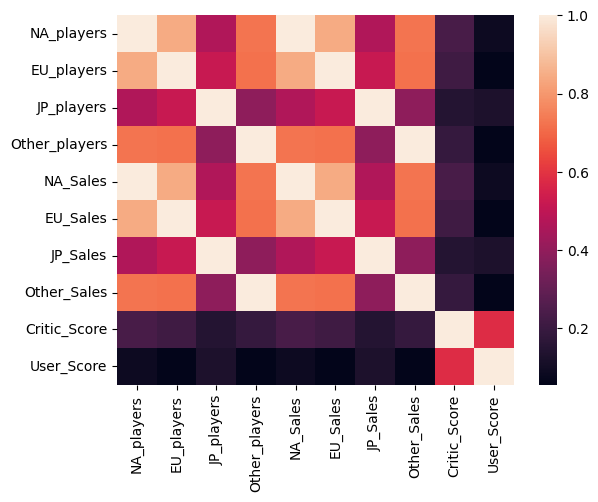

In [4]:

sns.heatmap(X.corr(), 
        xticklabels=X.columns,
        yticklabels=X.columns)

La correlación de entre el puntaje de los críticos y usuarios con respecto a las demás variables indica que ni los puntajes de críticos ni los puntajes de los usuarios son viables como una medida de desempeño de un juego.

## Modelo NN <a class="anchor" id="ModeloNN"></a>

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

model = Sequential()
model.add(Dense(11, input_dim=10, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(12, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #uso de adam para facilitar ajuste de tasa de aprendizaje

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=200, batch_size=100)

Epoch 1/200
55/55 [==============================] - 2s 17ms/step - loss: 2.4387 - accuracy: 0.1855 - val_loss: 2.3981 - val_accuracy: 0.2147
Epoch 2/200
55/55 [==============================] - 0s 5ms/step - loss: 2.3601 - accuracy: 0.2381 - val_loss: 2.3303 - val_accuracy: 0.2696
Epoch 3/200
55/55 [==============================] - 0s 5ms/step - loss: 2.2986 - accuracy: 0.2630 - val_loss: 2.2838 - val_accuracy: 0.2740
Epoch 4/200
55/55 [==============================] - 0s 5ms/step - loss: 2.2619 - accuracy: 0.2672 - val_loss: 2.2547 - val_accuracy: 0.2711
Epoch 5/200
55/55 [==============================] - 0s 6ms/step - loss: 2.2403 - accuracy: 0.2694 - val_loss: 2.2372 - val_accuracy: 0.2725
Epoch 6/200
55/55 [==============================] - 0s 8ms/step - loss: 2.2273 - accuracy: 0.2700 - val_loss: 2.2267 - val_accuracy: 0.2725
Epoch 7/200
55/55 [==============================] - 0s 7ms/step - loss: 2.2188 - accuracy: 0.2716 - val_loss: 2.2184 - val_accuracy: 0.2784
Epoch 8/200


Epoch 59/200
55/55 [==============================] - 0s 5ms/step - loss: 2.1098 - accuracy: 0.2989 - val_loss: 2.1172 - val_accuracy: 0.2952
Epoch 60/200
55/55 [==============================] - 0s 5ms/step - loss: 2.1097 - accuracy: 0.2978 - val_loss: 2.1169 - val_accuracy: 0.2952
Epoch 61/200
55/55 [==============================] - 0s 5ms/step - loss: 2.1095 - accuracy: 0.2960 - val_loss: 2.1171 - val_accuracy: 0.2967
Epoch 62/200
55/55 [==============================] - 0s 5ms/step - loss: 2.1086 - accuracy: 0.2969 - val_loss: 2.1157 - val_accuracy: 0.2967
Epoch 63/200
55/55 [==============================] - 0s 5ms/step - loss: 2.1075 - accuracy: 0.2995 - val_loss: 2.1150 - val_accuracy: 0.2989
Epoch 64/200
55/55 [==============================] - 0s 5ms/step - loss: 2.1073 - accuracy: 0.2980 - val_loss: 2.1150 - val_accuracy: 0.2967
Epoch 65/200
55/55 [==============================] - 0s 5ms/step - loss: 2.1074 - accuracy: 0.2963 - val_loss: 2.1145 - val_accuracy: 0.2952
Epoch 

55/55 [==============================] - 0s 5ms/step - loss: 2.0891 - accuracy: 0.3004 - val_loss: 2.1044 - val_accuracy: 0.2967
Epoch 117/200
55/55 [==============================] - 0s 6ms/step - loss: 2.0884 - accuracy: 0.3033 - val_loss: 2.1041 - val_accuracy: 0.3011
Epoch 118/200
55/55 [==============================] - 0s 5ms/step - loss: 2.0877 - accuracy: 0.3027 - val_loss: 2.1045 - val_accuracy: 0.3004
Epoch 119/200
55/55 [==============================] - 0s 6ms/step - loss: 2.0877 - accuracy: 0.3035 - val_loss: 2.1034 - val_accuracy: 0.3033
Epoch 120/200
55/55 [==============================] - 0s 6ms/step - loss: 2.0876 - accuracy: 0.3044 - val_loss: 2.1038 - val_accuracy: 0.2989
Epoch 121/200
55/55 [==============================] - 0s 6ms/step - loss: 2.0867 - accuracy: 0.3051 - val_loss: 2.1061 - val_accuracy: 0.2974
Epoch 122/200
55/55 [==============================] - 0s 7ms/step - loss: 2.0872 - accuracy: 0.3024 - val_loss: 2.1034 - val_accuracy: 0.3004
Epoch 123/200

55/55 [==============================] - 0s 5ms/step - loss: 2.0764 - accuracy: 0.3022 - val_loss: 2.0992 - val_accuracy: 0.3048
Epoch 174/200
55/55 [==============================] - 0s 5ms/step - loss: 2.0770 - accuracy: 0.3048 - val_loss: 2.1004 - val_accuracy: 0.2996
Epoch 175/200
55/55 [==============================] - 0s 5ms/step - loss: 2.0763 - accuracy: 0.3024 - val_loss: 2.1010 - val_accuracy: 0.2989
Epoch 176/200
55/55 [==============================] - 0s 5ms/step - loss: 2.0770 - accuracy: 0.3048 - val_loss: 2.0999 - val_accuracy: 0.3048
Epoch 177/200
55/55 [==============================] - 0s 5ms/step - loss: 2.0762 - accuracy: 0.3020 - val_loss: 2.0999 - val_accuracy: 0.3004
Epoch 178/200
55/55 [==============================] - 0s 5ms/step - loss: 2.0760 - accuracy: 0.3031 - val_loss: 2.0995 - val_accuracy: 0.3048
Epoch 179/200
55/55 [==============================] - 0s 5ms/step - loss: 2.0757 - accuracy: 0.3064 - val_loss: 2.1001 - val_accuracy: 0.3026
Epoch 180/200

Text(0.5, 0, 'Epoch o Epocas')

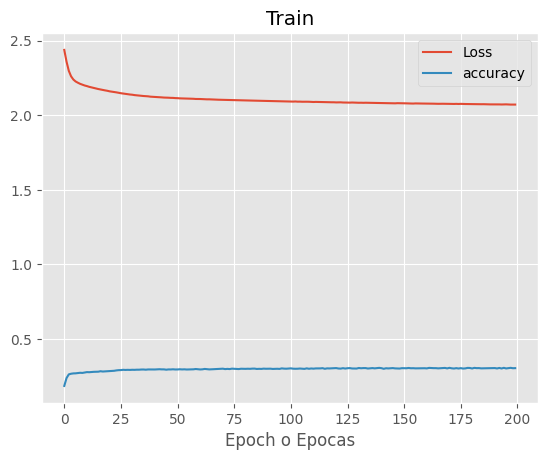

In [6]:
plt.style.use("ggplot")
plt.plot(pd.DataFrame(history.history)["loss"])
plt.plot(pd.DataFrame(history.history)["accuracy"])
plt.legend(["Loss","accuracy"])
plt.title("Train")
plt.xlabel("Epoch o Epocas")

Text(0.5, 0, 'Epoch o Epocas')

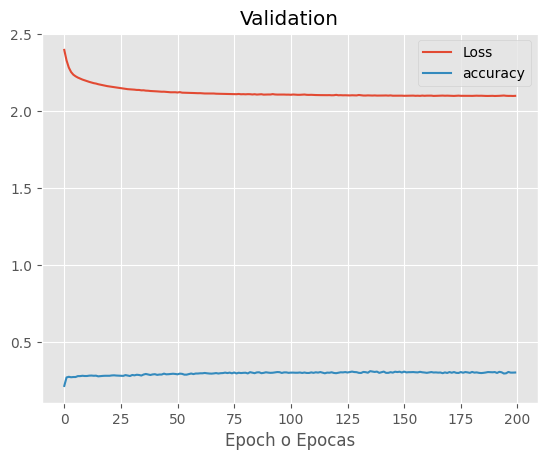

In [7]:
plt.style.use("ggplot")
plt.plot(pd.DataFrame(history.history)["val_loss"])
plt.plot(pd.DataFrame(history.history)["val_accuracy"])
plt.legend(["Loss","accuracy"])
plt.title("Validation")
plt.xlabel("Epoch o Epocas")

In [8]:
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Validation Accuracy:", score[1])


171/171 [==============================] - 1s 4ms/step - loss: 2.0696 - accuracy: 0.3048

 Training Accuracy: 0.3047619163990021
43/43 [==============================] - 0s 3ms/step - loss: 2.0996 - accuracy: 0.3018

 Validation Accuracy: 0.30183151364326477


Este resultado indica una definición correcta del modelo, pero una dificultad de alcanzar la predicción de los resultados deseados

## Clustering

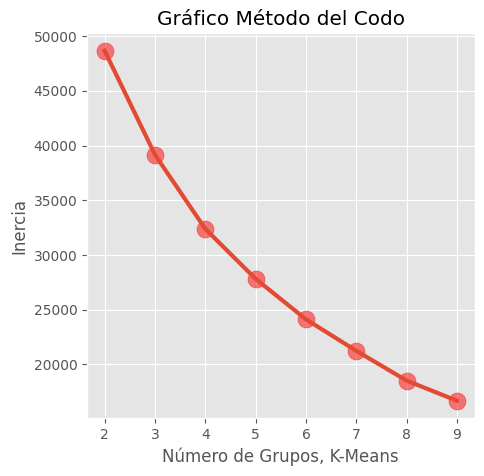

In [9]:
rango_n_grupos = range(2,10,1)
inercias = []

fig, ax = plt.subplots(figsize=(5,5))

for k in rango_n_grupos:
    modelo = KMeans(n_clusters = k, random_state=10)
    modelo.fit(X)
    inercias.append(modelo.inertia_)

plt.scatter(rango_n_grupos, inercias, c = 'red', s=150, marker='o', alpha=0.5)
plt.plot(rango_n_grupos, inercias, lw=3, linestyle='-', label='Varianza Explicada')

ax.set(title='Gráfico Método del Codo', 
       xlabel='Número de Grupos, K-Means', 
       ylabel='Inercia')
      
plt.show()

In [10]:
rango_n_grupos = range(2, 10)
puntuaciones = []
all_n_grupos = []
for n_grupos in rango_n_grupos:
    try:
        KMean= KMeans(n_clusters=n_grupos, random_state=10)
        KMean.fit(X)
        etiquetas=KMean.predict(X)
        score = silhouette_score(X, etiquetas)
        puntuaciones.append(score)
        all_n_grupos.append(n_grupos)
        print('Número de Grupos:', n_grupos, 'Silhouette Score:', score)
    except:
        pass

Número de Grupos: 2 Silhouette Score: 0.8811568
Número de Grupos: 3 Silhouette Score: 0.69830143
Número de Grupos: 4 Silhouette Score: 0.33788255
Número de Grupos: 5 Silhouette Score: 0.33727542
Número de Grupos: 6 Silhouette Score: 0.3531532
Número de Grupos: 7 Silhouette Score: 0.35310546
Número de Grupos: 8 Silhouette Score: 0.3679501
Número de Grupos: 9 Silhouette Score: 0.37510395


El resultado del metodo de Slhouette indica que lo mas optimo es usar 2 grupos para clasificar

In [11]:
pca = PCA(random_state = 123, n_components = 2)
comp_pca = pca.fit_transform(X.T)
print("Dimensionalidad Original:",X.shape)
print("Dimensionalidad de eigenvectores:",comp_pca.shape)

PCAs = []
for i in range(1, comp_pca.shape[1]+1):
    PCAs.append('PCA'+ str(i))
    


df_CompPrin = pd.DataFrame(data = comp_pca, 
                     columns = PCAs, 
                     index=[variables])


factor_exposures = pd.DataFrame(index=df_CompPrin.columns.tolist(), 
                                columns= X.T.columns,
                                data = pca.components_).T

df_CompPrin.head(38)

Dimensionalidad Original: (6825, 10)
Dimensionalidad de eigenvectores: (10, 2)


,PCA1,PCA2
NA_players,-25.318020,-12.929424
EU_players,-26.706820,-5.535095
JP_players,6.626649,58.925915
Other_players,-24.750496,-20.438028
NA_Sales,-25.318033,-12.929416
EU_Sales,-26.706806,-5.535081
JP_Sales,6.626646,58.925926
Other_Sales,-24.750496,-20.438042
Critic_Score,63.297333,-24.856363
User_Score,77.000031,-15.190465


El primer vector de PCA muestra una fuerte relación con respecto a las métricas de opiniones y una ligera oposición a las métricas distintas al mercado japones. Por el lado del segundo vector es fácilmente interpretable como las métricas del mercado japones.

In [12]:
PCA_Varianza = pd.DataFrame({'Componente' : pd.Series(range(1, comp_pca.shape[1]+1)), 
              'Varianza Explicada' : 100*pca.explained_variance_ratio_, 
              'Varianza Acumulada' : 100*pca.explained_variance_ratio_.cumsum()}).set_index('Componente')

PCA_Varianza = PCA_Varianza[['Varianza Explicada', 'Varianza Acumulada']]
PCA_Varianza.head(15)

,Varianza Explicada,Varianza Acumulada
Componente,,
1,43.467857,43.467857
2,28.104818,71.572670


In [13]:
modelo_kmeans = KMeans(n_clusters=2, 
                  init='k-means++', 
                  max_iter=300,
                  random_state=123)

modelo_kmeans.fit(X)

etiquetas = modelo_kmeans.labels_

print("Numero de datos del grupo 1:",len(etiquetas[etiquetas==0]) )
print("Numero de datos del grupo 2:",len(etiquetas[etiquetas==1]) )

Numero de datos del grupo 1: 6768
Numero de datos del grupo 2: 57


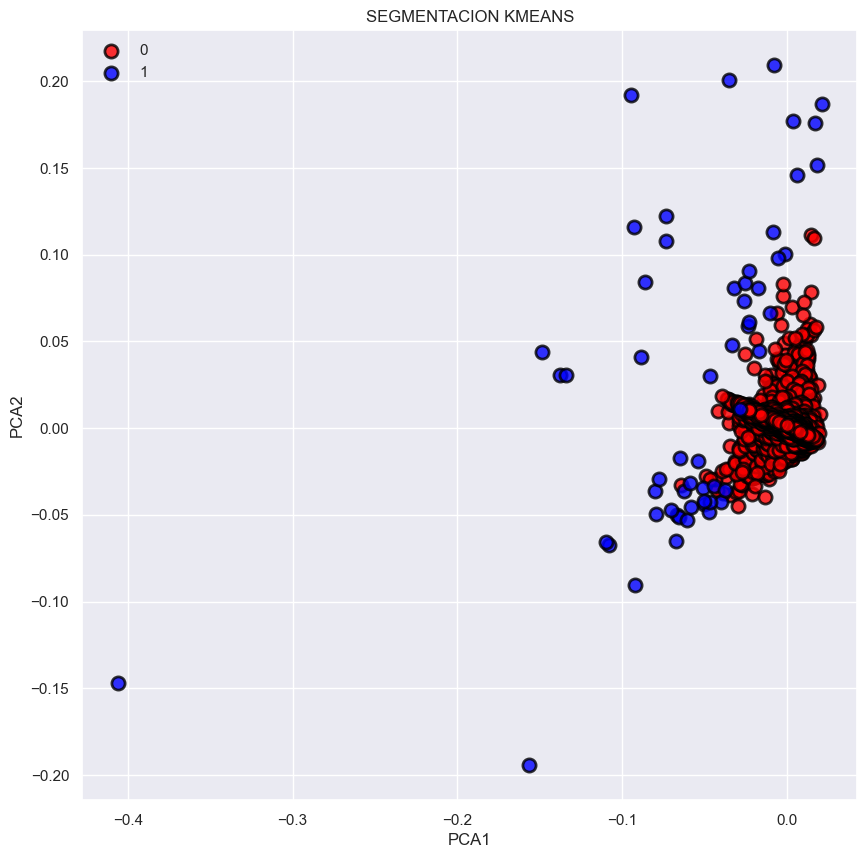

In [14]:


fig = plt.figure(figsize=(10,10))

sns.set(style = "darkgrid")
ax = fig.add_subplot(111)
plt.title("SEGMENTACION KMEANS")
for industry, color in zip(np.unique(etiquetas),["Red","Blue","Green"]):
    indicesToKeep = etiquetas == industry
    ax.scatter(factor_exposures.loc[indicesToKeep,'PCA1'], 
               factor_exposures.loc[indicesToKeep,'PCA2'], 
               c = color, s = 90, alpha=0.8, edgecolors='black', linewidth=2)

plt.legend(np.unique(etiquetas),loc='upper left',frameon=False)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
plt.show()

El resultado de esta separación muestra un limite donde se diferenciaban aquellos juegos con un desempeño en el mercado japones correlacionado con las opiniones de críticos y usuarios contra aquellos juegos que presentaban disparidades entre estos pares de métricas.

In [15]:
resultado = data1
resultado['clusterID'] = etiquetas
gp1 = resultado[resultado['clusterID'] == 0]
gp2 = resultado[resultado['clusterID'] == 1]
gp1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,6768.0,2007.436170,4.211464,1985.0,2004.00,2007.00,2011.00,2016.00
NA_players,6768.0,0.342215,0.556437,0.0,0.06,0.15,0.38,7.04
EU_players,6768.0,0.197543,0.385448,0.0,0.02,0.06,0.20,6.42
JP_players,6768.0,0.047980,0.165301,0.0,0.00,0.00,0.01,2.78
Other_players,6768.0,0.068388,0.139755,0.0,0.01,0.02,0.07,2.93
Critic_Score,6768.0,70.140514,13.824778,13.0,62.00,72.00,80.00,98.00
Critic_Count,6768.0,28.696661,19.036416,3.0,14.00,24.00,39.00,113.00
User_Count,6768.0,166.211141,564.733080,4.0,11.00,26.00,86.00,10665.00
NA_Sales,6768.0,0.342215,0.556437,0.0,0.06,0.15,0.38,7.04
EU_Sales,6768.0,0.197543,0.385448,0.0,0.02,0.06,0.20,6.42


In [16]:
gp2.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,57.0,2007.508772,4.222063,1997.00,2005.00,2008.00,2011.00,2015.00
NA_players,57.0,6.600702,6.090027,0.47,3.01,4.99,8.52,41.36
EU_players,57.0,4.812982,4.255983,0.00,2.81,3.69,5.73,28.96
JP_players,57.0,1.985088,1.728512,0.00,0.38,1.87,3.28,6.50
Other_players,57.0,1.779298,1.886826,0.15,0.78,1.28,1.97,10.57
Critic_Score,57.0,85.894737,9.581761,58.00,81.00,88.00,93.00,98.00
Critic_Count,57.0,56.771930,21.180363,10.00,42.00,62.00,73.00,100.00
User_Count,57.0,1185.315789,1569.314911,16.00,197.00,632.00,1454.00,8713.00
NA_Sales,57.0,6.600702,6.090027,0.47,3.01,4.99,8.52,41.36
EU_Sales,57.0,4.812982,4.255983,0.00,2.81,3.69,5.73,28.96


In [17]:
genre_count_tot = 0 
for i in resultado['Genre'].unique():
    tipo = resultado[resultado['Genre'] == i].shape[0]
    genre_count_tot += tipo
    tipo_gp1 = resultado[(resultado['Genre'] == i) & (resultado['clusterID'] == 0)].shape[0]
    tipo_gp2 = resultado[(resultado['Genre'] == i) & (resultado['clusterID'] == 1)].shape[0]
    print("De ", tipo, "juegos tipo ", i, " : ", tipo_gp1, "pertenecen al grupo 0 y ", tipo_gp2, "son del grupo 1")
print(genre_count_tot)    

De  943 juegos tipo  Sports  :  938 pertenecen al grupo 0 y  5 son del grupo 1
De  581 juegos tipo  Racing  :  573 pertenecen al grupo 0 y  8 son del grupo 1
De  403 juegos tipo  Platform  :  398 pertenecen al grupo 0 y  5 son del grupo 1
De  384 juegos tipo  Misc  :  377 pertenecen al grupo 0 y  7 son del grupo 1
De  1630 juegos tipo  Action  :  1620 pertenecen al grupo 0 y  10 son del grupo 1
De  118 juegos tipo  Puzzle  :  117 pertenecen al grupo 0 y  1 son del grupo 1
De  864 juegos tipo  Shooter  :  854 pertenecen al grupo 0 y  10 son del grupo 1
De  378 juegos tipo  Fighting  :  377 pertenecen al grupo 0 y  1 son del grupo 1
De  297 juegos tipo  Simulation  :  295 pertenecen al grupo 0 y  2 son del grupo 1
De  712 juegos tipo  Role-Playing  :  704 pertenecen al grupo 0 y  8 son del grupo 1
De  248 juegos tipo  Adventure  :  248 pertenecen al grupo 0 y  0 son del grupo 1
De  267 juegos tipo  Strategy  :  267 pertenecen al grupo 0 y  0 son del grupo 1
6825


In [57]:
print(gp2)

                                               Name Platform  Year_of_Release  \
0                                        Wii Sports      Wii           2006.0   
2                                    Mario Kart Wii      Wii           2008.0   
3                                 Wii Sports Resort      Wii           2009.0   
6                             New Super Mario Bros.       DS           2006.0   
7                                          Wii Play      Wii           2006.0   
8                         New Super Mario Bros. Wii      Wii           2009.0   
11                                    Mario Kart DS       DS           2005.0   
13                                          Wii Fit      Wii           2007.0   
14                               Kinect Adventures!     X360           2010.0   
15                                     Wii Fit Plus      Wii           2009.0   
16                               Grand Theft Auto V      PS3           2013.0   
17                    Grand 

## Conclusiones

- Se puede encontrar que ni los puntajes de críticos ni los usuarios son viables como una medida de desempeño de un juego.

- Las preferencias de los juegos no se enfocan en un solo género en ninguno de los mercados demostrando que para todo juego que este bien realizado existe un mercado dispuesto a comprarlo y jugarlo. 

- Los resultados anteriores pueden ser explicados por algunos juegos particulares que se desvían de la opinión publicada en metacritic con respecto al desempeño japones. Varias de estas desviaciones se encuentran en juegos publicados por Nintendo.

